# 1. Import the dataset

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('data.csv')
df.head(10)

,label,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


# 2. Data preprocessing

In [ ]:
df.label.value_counts()

0    800000
4    800000
Name: label, dtype: int64

<AxesSubplot:xlabel='label'>

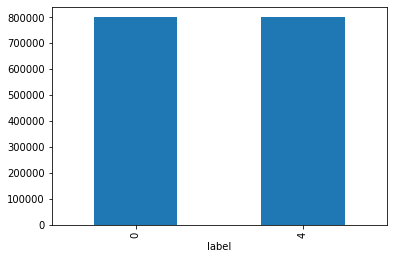

In [ ]:
df.groupby('label').size().plot(kind='bar')

In [ ]:
# Mapping a dictionary of apostrophe words
appos = {
"aren't" : "are not",
"can't" : "cannot",
"cant" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"im" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not",
"gg" : "going"
}

In [ ]:
import re

def preprocess_text(sentence):
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','', sentence['text'])
    text = re.sub('@[^\s]+','', text)
    text = text.lower().split()
    reformed = [appos[word] if word in appos else word for word in text]
    reformed = " ".join(reformed) 
    text = re.sub('&[^\s]+;', '', reformed)
    text = re.sub('[^a-zA-Zа-яА-Я1-9]+', ' ', text)
    text = re.sub(' +',' ', text)
    return text.strip()

preprocess = df
preprocess['text'] = preprocess.apply(preprocess_text, axis=1)

preprocess.head(10)

,label,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,awww that is a bummer you shoulda got david ca...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cannot update his facebook by...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,i dived many times for the ball managed to sav...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,no it is not behaving at all I am mad why am i...
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,hey long time no see yes rains a bit only a bi...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,nope they did not have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,que me muera


In [ ]:
from sklearn.model_selection import train_test_split

X = preprocess['text']
y = preprocess['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 41)


# **MACHINE LEARNING METHODS**

# Sentiment Analysis using Machine Learning-based Method: Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# TF-IDF
tfidf = TfidfVectorizer(analyzer = 'word', ngram_range = (1, 1), min_df = 1, stop_words = 'english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Count Vectorizer
cvt = CountVectorizer(analyzer = 'word', ngram_range = (1, 1), min_df = 1, stop_words = 'english')
X_train_cvt = cvt.fit_transform(X_train)
X_test_cvt = cvt.transform(X_test)

# NBC for Tf-idf
nbc_tfidf = MultinomialNB(alpha=1.0, fit_prior=True)
nbc_tfidf.fit(X_train_tfidf, y_train)
print(f"Accuracy for Tf-idf vectorizer: {nbc_tfidf.score(X_test_tfidf, y_test) * 100:.3f}%", )
# print('Accuracy for Tf-idf vectorizer: '+ str(nbc_tfidf.score(X_test_tfidf, y_test) * 100))

# NBC for Count Vectorizer
nbc_cvt = MultinomialNB(alpha=1.0, fit_prior=True)
nbc_cvt.fit(X_train_cvt, y_train)
print(f"Accuracy for Count vectorizer: {nbc_cvt.score(X_test_tfidf, y_test) * 100:.3f}%", )
# print('Accuracy for Count vectorizer: '+ str(nbc_cvt.score(X_test_tfidf, y_test)))

Accuracy for Tf-idf vectorizer: 75.794%
Accuracy for Count vectorizer: 75.381%


# Sentiment Analysis using Machine Learning-based Method: Linear SVM

In [ ]:
from sklearn.svm import LinearSVC

# TF-IDF
tfidf = TfidfVectorizer(analyzer = 'word', ngram_range = (1, 1), min_df = 1, stop_words = 'english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Count Vectorizer
cvt = CountVectorizer(analyzer = 'word', ngram_range = (1, 1), min_df = 1, stop_words = 'english')
X_train_cvt = cvt.fit_transform(X_train)
X_test_cvt = cvt.transform(X_test)

# SVM for Tf-idf
clf_svm_tfidf = LinearSVC()
clf_svm_tfidf.fit(X_train_tfidf, y_train)
print(f"Accuracy for Tf-idf vectorizer: {clf_svm_tfidf.score(X_test_tfidf, y_test) * 100:.3f}%", )

# SVM for Count Vectorizer
clf_svm_cvt = LinearSVC()
clf_svm_cvt.fit(X_train_cvt, y_train)
print(f"Accuracy for Count vectorizer: {clf_svm_cvt.score(X_test_cvt, y_test) * 100:.3f}%", )

Accuracy for Tf-idf vectorizer: 76.629%
Accuracy for Count vectorizer: 76.405%


D:\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# **DEEP LEARNING METHODS**

In [ ]:
!pip install d2l==0.17.0

In [ ]:
import os
import tensorflow as tf
from d2l import tensorflow as d2l

In [ ]:
_X_train = X_train.to_numpy()
_y_train = np.array(y_train)
randomize = np.arange(len(X_train))
np.random.shuffle(randomize)
X_train = _X_train[randomize]
y_train = _y_train[randomize]

In [ ]:
def transform(x):
  x = int(x)
  if x == 4:
    return 1 #positive
  else:
    return 0 #negative
y_train = [transform(label) for label in y_train]
y_test = [transform(label) for label in y_test]

In [ ]:
def load_data_sa(X_train, y_train, X_test, y_test, batch_size, num_steps=500):
    train_tokens = d2l.tokenize(X_train, token='word')
    test_tokens = d2l.tokenize(X_test, token='word')
    vocab = d2l.Vocab(train_tokens, min_freq=5, reserved_tokens=['<pad>'])
    train_features = [
        d2l.truncate_pad(vocab[line], num_steps, vocab['<pad>'])
        for line in train_tokens]
    test_features = [
        d2l.truncate_pad(vocab[line], num_steps, vocab['<pad>'])
        for line in test_tokens]
    train_iter = d2l.load_array((train_features, y_train), batch_size)
    test_iter = d2l.load_array((test_features, y_test), batch_size)
    return train_iter, test_iter, vocab

batch_size = 64
train_iter, test_iter, vocab = load_data_sa(X_train, y_train, X_test, y_test, batch_size, num_steps=200)

In [ ]:
def train_batch_ch15(net, X, y, loss, optimizer, devices):
    with tf.GradientTape() as tape:
      y_hat = net(X)
      l = loss(y, y_hat)
    grads = tape.gradient(l, net.trainable_variables)
    optimizer.apply_gradients(zip(grads, net.trainable_variables))
    train_loss_sum = l * float(tf.size(y))
    train_acc_sum = d2l.accuracy(y_hat, y)
    return train_loss_sum, train_acc_sum

def train_ch15(net, train_iter, test_iter, loss, trainer, num_epochs, devices=d2l.try_gpu()):
    timer, num_batches = d2l.Timer(), len(train_iter)
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs], legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        # Sum of training loss, sum of training accuracy, no. of examples,
        # no. of predictions
        metric = d2l.Accumulator(4)
        for i, (features, labels) in enumerate(train_iter):
            timer.start()
            l, acc = train_batch_ch15(net, features, labels, loss, trainer, devices)
            metric.add(l, acc, float(labels.shape[0]), float(tf.size(labels)))
            timer.stop()
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(
                    epoch + (i + 1) / num_batches,
                    (metric[0] / metric[2], metric[1] / metric[3], None))
        test_acc = d2l.evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, (None, None, test_acc))
    print(f'loss {metric[0] / metric[2]:.3f}, train acc '
          f'{metric[1] / metric[3]:.3f}, test acc {test_acc:.3f}')
    print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec on '
          f'{str(devices)}')

# Glove Embedding

In [ ]:
class TokenEmbedding:
  """Token Embedding"""
  def __init__(self, embedding_name):
    self.idx_to_token, self.idx_to_vec = self._load_embedding(embedding_name)
    self.unknown_idx = 0
    self.token_to_idx = {token: idx for idx, token in enumerate(self.idx_to_token)}

  def _load_embedding(self, embedding_name):
    idx_to_token, idx_to_vec = ['<unk>'], []
    data_dir = d2l.download_extract(embedding_name)
    with open(os.path.join(data_dir, 'vec.txt'), 'r', encoding="utf8") as f:
      for line in f:
        elems = line.rstrip().split(' ')
        token, elems = elems[0], [float(elem) for elem in elems[1:]]
        # Skip header information, such as the top row in fastText
        if len(elems) > 1:
          idx_to_token.append(token)
          idx_to_vec.append(elems)
    idx_to_vec = [[0] * len(idx_to_vec[0])] + idx_to_vec
    return idx_to_token, tf.constant(idx_to_vec)

  def __getitem__(self, tokens):
    indices = [self.token_to_idx.get(token, self.unknown_idx) for token in tokens]
    if len(indices) == 1:
      vecs = self.idx_to_vec[indices]
    else:
      vecs = []
      for idx in indices:
        vecs.append(self.idx_to_vec[idx])
    return vecs

  def __len__(self):
    return len(self.idx_to_token)

In [ ]:
d2l.DATA_HUB['glove.6b.100d'] = (d2l.DATA_URL + 'glove.6B.100d.zip', 'cd43bfb07e44e6f27cbcc7bc9ae3d80284fdaf5a')
glove_embedding = TokenEmbedding('glove.6b.100d')

In [ ]:
embeds = glove_embedding[vocab.idx_to_token]
embeds = tf.convert_to_tensor(embeds)
embeds.shape

TensorShape([46805, 100])

# Sentiment Analysis using Deep Learning-based Method: MLP

## Using Glove

In [ ]:
net = tf.keras.models.Sequential(
    [
     tf.keras.layers.Embedding(len(vocab), 100, weights=[embeds], trainable=True),
     tf.keras.layers.Dense(512, activation='relu'),
     tf.keras.layers.GlobalAveragePooling1D(),
     tf.keras.layers.Dense(256, activation='relu'),
     tf.keras.layers.Dropout(0.3),
     tf.keras.layers.Dense(100, activation='relu'),
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(1, activation='sigmoid'),
    ]
)

loss 0.052, train acc 0.982, test acc 0.935
2289.1 examples/sec on <tensorflow.python.eager.context._EagerDeviceContext object at 0x7f30c0acfc30>


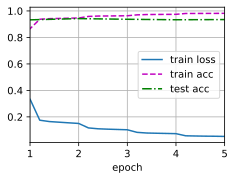

In [ ]:
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy()
train_ch15(net, train_iter, test_iter, loss, optimizer, num_epochs=5)

In [ ]:
def predict_sentiment(net, vocab, sentence):
    sentence = tf.constant(vocab[sentence.split()])
    label = tf.argmax(net(tf.reshape(sentence, (1, -1))), axis=1)
    if label == 1:
      return 'positive'
    else:
      return 'negative'


In [ ]:
# import pickle
# # save model
# net.save('sa_bilstm')

# # save vocab
# file_to_store = open("vocab.pickle", "wb")
# pickle.dump(vocab, file_to_store)
# file_to_store.close()

# Inference 1000 sentences

In [ ]:
_X_test = X_test.values
sens = np.random.choice(_X_test, 1000, replace=False)

In [ ]:
def preprocess_text_single_sentence(sentence):
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','', sentence)
    text = re.sub('@[^\s]+','', text)
    text = text.lower().split()
    reformed = [appos[word] if word in appos else word for word in text]
    reformed = " ".join(reformed) 
    text = re.sub('&[^\s]+;', '', reformed)
    text = re.sub('[^a-zA-Zа-яА-Я1-9]+', ' ', text)
    text = re.sub(' +',' ', text)
    return text.strip()

In [ ]:
def infer():
  arr = []
  for sen in sens:
    preprocessed = preprocess_text_single_sentence(sen)
    arr.append(predict_sentiment(net, vocab, preprocessed))
  print(len(arr))
infer()